In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df_2017 = pd.read_csv("nba2017.csv")
df_2016 = pd.read_csv("nba2016.csv")
df_2015 = pd.read_csv("nba2015.csv")
df_2014 = pd.read_csv("nba2014.csv")
df_2013 = pd.read_csv("nba2013.csv")
df_2012 = pd.read_csv("nba2012.csv")
df_2011 = pd.read_csv("nba2011.csv")
df_2010 = pd.read_csv("nba2010.csv")

In [3]:
df2017 = df_2017[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2016 = df_2016[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2015 = df_2015[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2014 = df_2014[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2013 = df_2013[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2012 = df_2012[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2011 = df_2011[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]
df2010 = df_2010[['FG', 'ORB', 'DRB', 'TRB', 'PTS']]

In [5]:
def MultipleLinearRegression(X,Y):
    print("X.shape, Y.shape",(X.shape, Y.shape))
    temp1 = X.T.dot(X)
    temp2 = X.T.dot(Y)
    temp1 = np.linalg.inv(temp1)
    print("temp1.shape, temp2.shape",(temp1.shape, temp2.shape))
    beta_hat = temp1.dot(temp2)
    print("beta_hat.shape",beta_hat.shape)
    return(beta_hat)

### Part (a) Using 2016 data (change year to 2016 in url) as training, find the multiple linear regression fit for PTS as a function of only FG% and TRB (no $\beta_0$). Treat each row as a new observation. What can you infer about the contribution of TRB to total points?

In [6]:
x_train = np.array(df2016[['FG', 'TRB']])
y_train = np.array(df2016[['PTS']])
# linreg = LinearRegression()
# model = linreg.fit(x_train, y_train)
beta_hat = MultipleLinearRegression(x_train, y_train)
print(beta_hat)
# pred = x_train.dot(beta_hat)
# print(pred)

X.shape, Y.shape ((30, 2), (30, 1))
temp1.shape, temp2.shape ((2, 2), (2, 1))
beta_hat.shape (2, 1)
[[1.99319887]
 [0.60450058]]


## RESULTS FROM SKLEARN, REMOVE LATER


In [47]:
model.coef_

array([[1.80330389, 0.42912408]])

#### Inference: TRB contributes less to the PTS as compared to FG

### Part (b) Repeat part (a) but now also include ORB and DRB as predictors. What can you infer about the contribution of TRB to total points in this case? Explain, in words, why this happens. This is a result of Multicollinearity.

In [7]:
x_train = np.array(df2016[['FG', 'TRB', 'ORB', 'DRB']])
y_train = np.array(df2016[['PTS']])
# linreg = LinearRegression()
# model = linreg.fit(x_train, y_train)
beta_hat = MultipleLinearRegression(x_train, y_train)
print(beta_hat)

X.shape, Y.shape ((30, 4), (30, 1))
temp1.shape, temp2.shape ((4, 4), (4, 1))
beta_hat.shape (4, 1)
[[ 1.88408301]
 [ 4.48949085]
 [-4.10457579]
 [-3.68882471]]


## RESULTS FROM SKLEARN, REMOVE LATER

In [52]:
model.coef_

array([[ 1.73534637,  3.50315475, -3.23144641, -2.90025684]])

#### Inference:

### Part (c) Using 2017 as the test data (all 30 rows), and FG% and TRB as the two predictors, compute SSE and MAPE when using the following training data: (i) 2016, (ii) 2015-2016, (iii) 2010-2016.

In [8]:
# Defining the error functions

def SSE(x):
    x_bar = np.mean(x)
    sse = 0
    for i in x:
        sse += (i-x_bar)**2
    return(sse)
    
def MAPE(y, y_hat):
    temp = 0
    for i in range(len(y)):
        temp += abs((y[i]-y_hat[i])/y[i])
    temp = (100/len(y))*temp
    return(temp)

#### (i) Only 2016 training data

In [9]:
# Training the model
x_train = np.array(df2016[['FG', 'TRB']])
y_train = np.array(df2016[['PTS']])
# linreg = LinearRegression()
# clf = linreg.fit(x_train, y_train)
beta_hat = MultipleLinearRegression(x_train, y_train)
print(beta_hat)

X.shape, Y.shape ((30, 2), (30, 1))
temp1.shape, temp2.shape ((2, 2), (2, 1))
beta_hat.shape (2, 1)
[[1.99319887]
 [0.60450058]]


In [10]:
# Testing on 2017 data
x_test = df_2017[['FG', 'TRB']]
x_test = np.array(x_test)
# result1 = clf.predict(x_test)
result1 = x_test.dot(beta_hat)

In [11]:
# SSE
sse = SSE(result1)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result1)
print("MAPE:",mape)

SSE: [346.24328839]
MAPE: [2.13562798]


## RESULTS FROM SKLEARN, REMOVE LATER


In [125]:
# SSE
sse = SSE(result1)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result1)
print("MAPE:",mape)

SSE: [259.34487381]
MAPE: [2.08721264]


#### (ii) Using 2015-2016 training data

In [12]:
# Training the model
x1_train = np.array(df2015[['FG', 'TRB']])
x2_train = np.array(df2016[['FG', 'TRB']])
x1_train = np.vstack((x1_train, x2_train))

y1_train = np.array(df2015[['PTS']])
y2_train = np.array(df2016[['PTS']])
y1_train = np.vstack((y1_train, y2_train))
# linreg = LinearRegression()
# clf = linreg.fit(x1_train, y1_train)
beta_hat = MultipleLinearRegression(x1_train, y1_train)

X.shape, Y.shape ((60, 2), (60, 1))
temp1.shape, temp2.shape ((2, 2), (2, 1))
beta_hat.shape (2, 1)


In [13]:
# Testing on 2017 data
x_test = df_2017[['FG', 'TRB']]
x_test = np.array(x_test)
# result2 = clf.predict(x_test)
result2 = x_test.dot(beta_hat)

In [14]:
# SSE
sse = SSE(result2)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result2)
print("MAPE:",mape)

SSE: [364.5648547]
MAPE: [2.14132719]


## RESULTS FROM SKLEARN, REMOVE LATER


In [129]:
# SSE
sse = SSE(result2)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result2)
print("MAPE:",mape)

SSE: [318.86031943]
MAPE: [2.15901108]


#### (iii) Using 2010-2016

In [15]:
# Training the model
x1_train = np.array(df2010[['FG', 'TRB']])
x2_train = np.array(df2011[['FG', 'TRB']])
x3_train = np.array(df2012[['FG', 'TRB']])
x4_train = np.array(df2013[['FG', 'TRB']])
x5_train = np.array(df2014[['FG', 'TRB']])
x6_train = np.array(df2015[['FG', 'TRB']])
x7_train = np.array(df2016[['FG', 'TRB']])
x1_train = np.vstack((x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train))

y1_train = np.array(df2010[['PTS']])
y2_train = np.array(df2011[['PTS']])
y3_train = np.array(df2012[['PTS']])
y4_train = np.array(df2013[['PTS']])
y5_train = np.array(df2014[['PTS']])
y6_train = np.array(df2015[['PTS']])
y7_train = np.array(df2016[['PTS']])
y1_train = np.vstack((y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train))

# linreg = LinearRegression()
# clf = linreg.fit(x1_train, y1_train)
beta_hat = MultipleLinearRegression(x1_train, y1_train)

X.shape, Y.shape ((210, 2), (210, 1))
temp1.shape, temp2.shape ((2, 2), (2, 1))
beta_hat.shape (2, 1)


In [16]:
# Testing on 2017 data
x_test = df_2017[['FG', 'TRB']]
x_test = np.array(x_test)
# result3 = clf.predict(x_test)
result3 = x_test.dot(beta_hat)

In [17]:
# SSE
sse = SSE(result3)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result3)
print("MAPE:",mape)

SSE: [379.1476772]
MAPE: [2.15980106]


## RESULTS FROM SKLEARN, REMOVE LATER


In [132]:
# SSE
sse = SSE(result3)
print("SSE:",sse)
# MAPE
actual = np.array(df_2017[['PTS']])
mape = MAPE(actual, result3)
print("MAPE:",mape)

SSE: [375.63727961]
MAPE: [2.16851898]


### Part (d) For (c), compute the residuals for (i), (ii), and (iii), and plot them against the predicted PTS.You should have 3 plots. What can you say about the variance of residuals as a function of predicted PTS? Why is this important? 

In [18]:
def compute_residual(y_hat, y):
    return(y-y_hat)

In [19]:
residual1 = compute_residual(result1,actual)
residual2 = compute_residual(result2,actual)
residual3 = compute_residual(result3,actual)

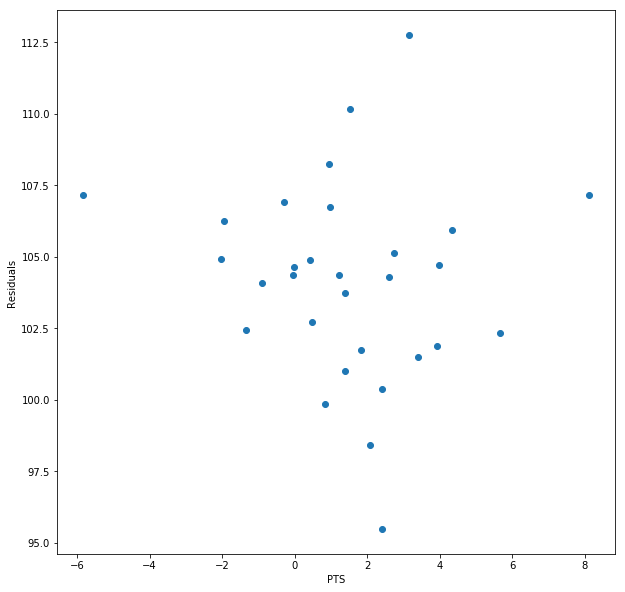

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(residual1, result1)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

## RESULTS FROM SKLEARN, REMOVE LATER


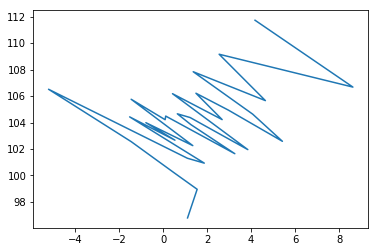

In [150]:
plt.plot(residual1, result1)
plt.show()

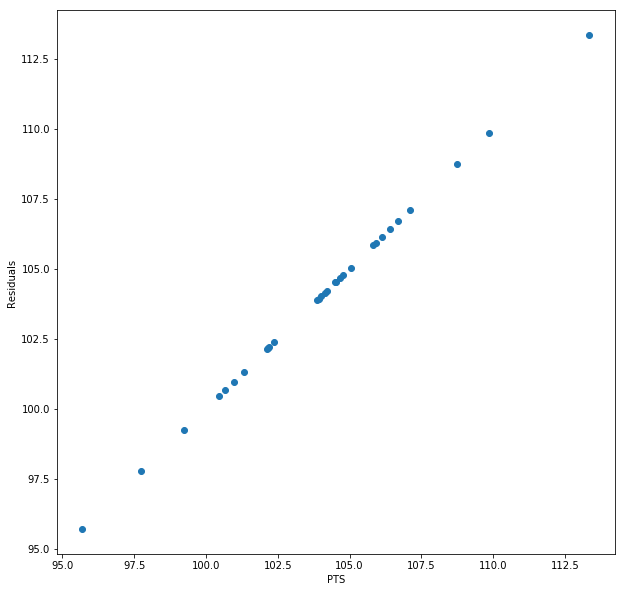

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(result2,result2)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

## RESULTS FROM SKLEARN, REMOVE LATER


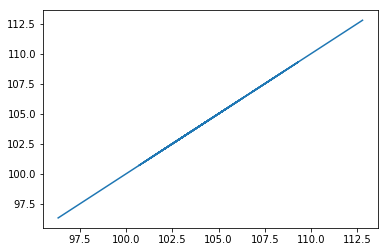

In [151]:
plt.plot(result2,result2)

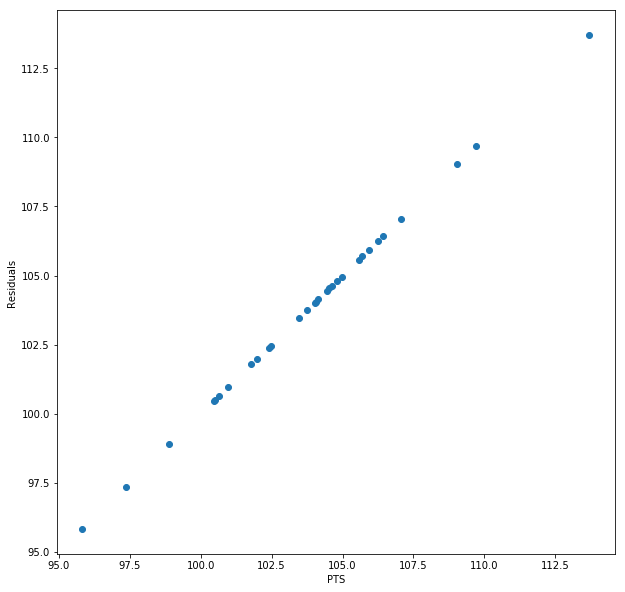

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(result3,result3)
plt.xlabel('PTS')
plt.ylabel('Residuals')
plt.show()

## RESULTS FROM SKLEARN, REMOVE LATER


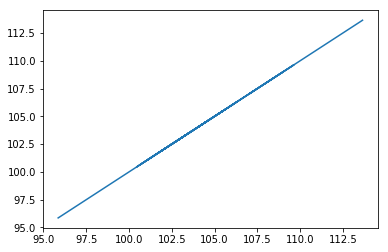

In [152]:
plt.plot(result3,result3)

#### TODO

### Part (e)  For (c), compute the residuals for (i), (ii), and (iii), and plot their distribution. You should have 3 plots. Comment on whether they are Normal. Why does Normality matter?

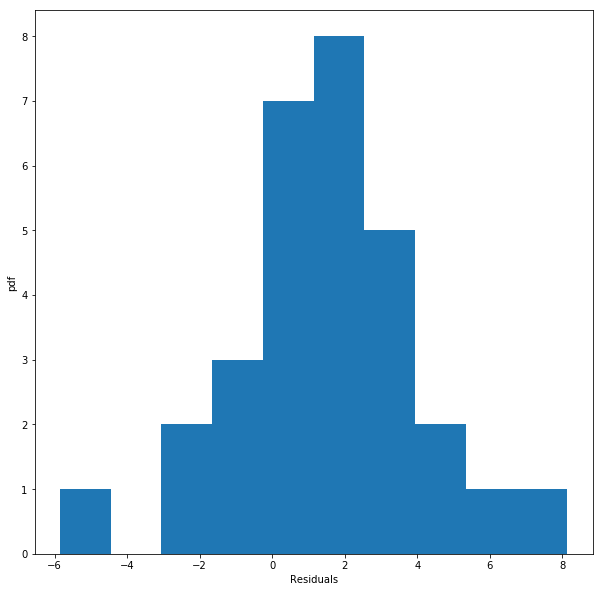

In [38]:
plt.figure(figsize=(10,10))
plt.hist(residual1)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.show()

## RESULTS FROM SKLEARN, REMOVE LATER


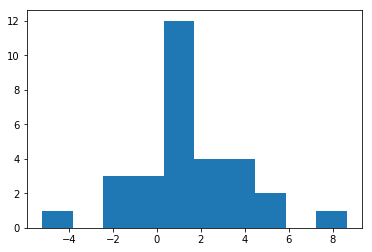

In [153]:
plt.hist(residual1)
plt.show()

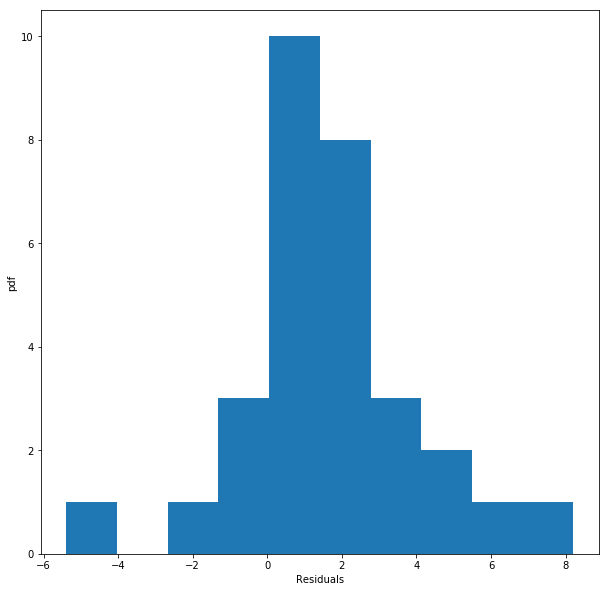

In [39]:
plt.figure(figsize=(10,10))
plt.hist(residual2)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.show()

## RESULTS FROM SKLEARN REMOVE LATER

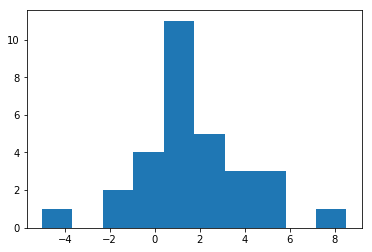

In [154]:
plt.hist(residual2)
plt.show()

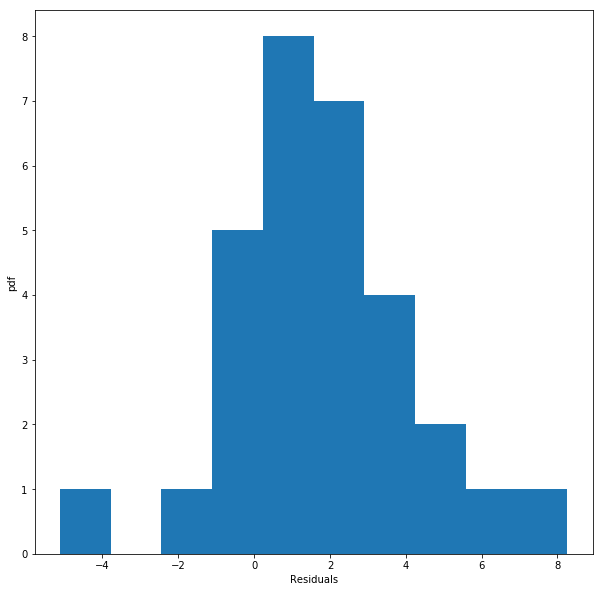

In [40]:
plt.figure(figsize=(10,10))
plt.hist(residual3)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.show()

## RESULTS FROM SKLEARN REMOVE LATER

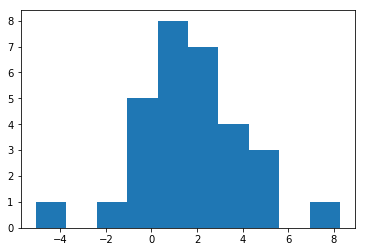

In [155]:
plt.hist(residual3)
plt.show()

#### TODO